In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('Student_Marks.csv')

In [ ]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  131 non-null    int64  
 1   time_study      127 non-null    float64
 2   Marks           122 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.2 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_courses,131.0,5.251908,1.820159,2.000,4.00000,5.0000,7.00000,8.000
time_study,127.0,3.880661,2.340316,0.096,1.96800,3.9190,6.10300,7.957
Marks,122.0,23.427475,13.812173,5.609,12.15125,19.6805,32.07675,55.299


In [ ]:
df.shape

(131, 3)

In [ ]:
df.isna().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

In [ ]:
df['time_study'].replace(np.nan,df['time_study'].mean(),inplace=True)
df['Marks'].replace(np.nan,df['Marks'].mean(),inplace=True)

In [ ]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [ ]:
df.duplicated().sum()

18

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(113, 3)

Text(0.5, 1.0, 'No. of Courses vs Marks')

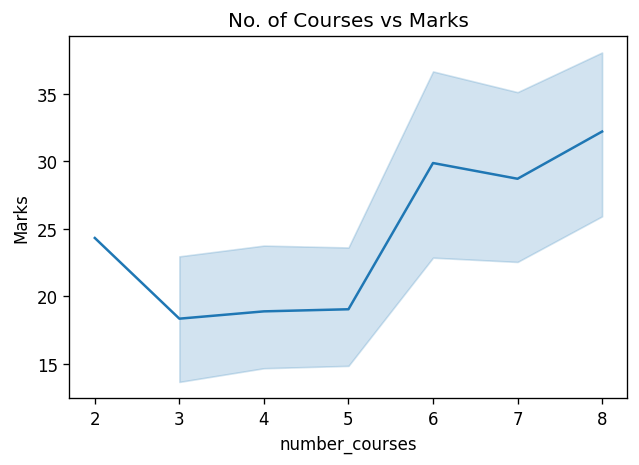

In [ ]:
plt.figure(dpi=120)
sns.lineplot(y='Marks',x='number_courses',data=df)
plt.title("No. of Courses vs Marks")

Text(0.5, 1.0, 'No. of Courses vs Marks')

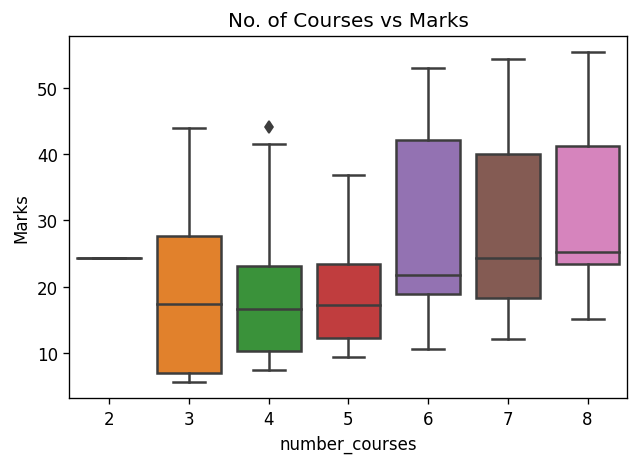

In [ ]:
plt.figure(dpi=120)
sns.boxplot(y='Marks',x='number_courses',data=df)
plt.title("No. of Courses vs Marks")

Text(0.5, 1.0, 'time_study vs Marks')

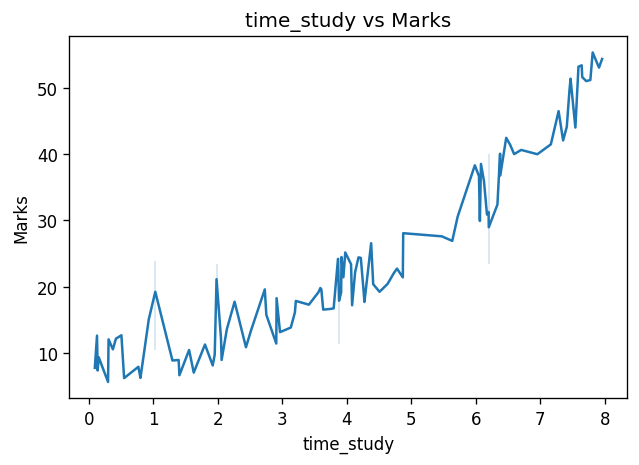

In [ ]:
plt.figure(dpi=120)
sns.lineplot(y='Marks',x='time_study',data=df)
plt.title("time_study vs Marks")

In [ ]:
df["time_study"].nunique()

100

array([0.096 , 0.8821, 1.6682, 2.4543, 3.2404, 4.0265, 4.8126, 5.5987,
       6.3848, 7.1709, 7.957 ])

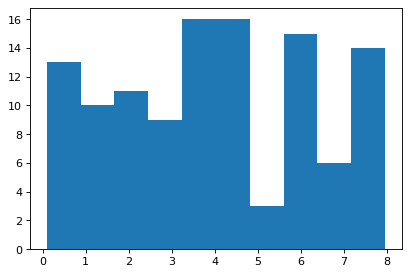

In [ ]:
plt.figure(dpi=80)
plt.hist(x='time_study',data=df,bins=10)[1]

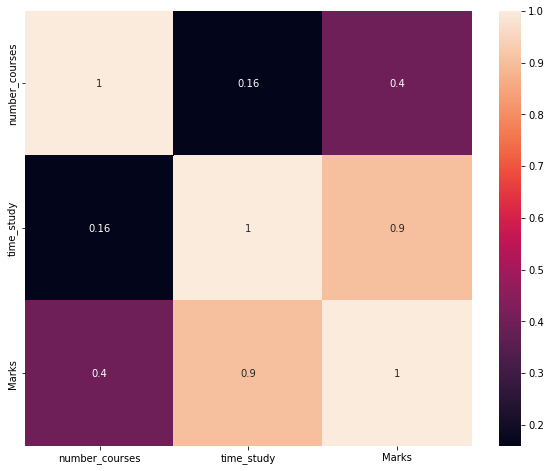

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df[['number_courses','time_study']]
Y = df['Marks']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,)

In [ ]:
from sklearn.linear_model import LinearRegression
reg_pred = LinearRegression()
reg_pred.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg_pred.score(x_test,y_test)

0.9160181411120054

In [ ]:
reg_pred.score(x_train,y_train)

0.8670092311954976

In [ ]:
y_test.shape

(23,)

In [ ]:
df1 = pd.DataFrame()

In [ ]:
df1['y_pred'] = reg_pred.predict(x_test)
df1['y_test'] = y_test.to_list()

In [ ]:
df1

,y_pred,y_test
0,13.679287,23.427475
1,30.549343,29.889000
2,18.447995,23.427475
3,30.487850,26.532000
4,16.668096,13.119000
5,1.595401,5.609000
6,44.195471,51.142000
7,38.260968,39.965000
8,38.846642,40.024000
9,14.695528,11.397000
